In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

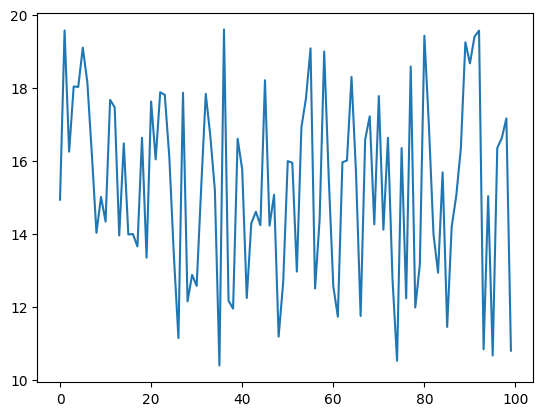

In [2]:
n = 100
theta = 10
xn = []
for i in range(n):
  xn.append(np.random.random()*theta + theta)

plt.plot(xn)

In [3]:
xmax = np.max(xn) #x(n) - максимум выборки
xmin = np.min(xn) #x(1) - минимум выборки
alpha1 = np.mean(xn) #оценка первого момента
T1 = 2/3*alpha1 #оценка методом моментов
T2 = (n+1)/(2*n+1)*xmax #несмещенная оценка методом правдоподобия
T3 = (n+1)/(5*n+4)*(xmin + 2*xmax) #предложенная оценка
print("оценка методом моментов:", T1)
print("несмещенная оценка методом правдоподобия:", T2)
print("предложенная оценка:", T3)

оценка методом моментов: 10.191896576148425
несмещенная оценка методом правдоподобия: 9.8473368781597
предложенная оценка: 9.936746563921458


In [4]:
beta = 0.95 #доверительная вероятность
alpha2 = 0 #несмещенная оценка второго момента
for xi in xn:
  alpha2 += xi*xi/(n-1)
print("[{:.3f}, {:.3f}] - точный".format(xmax/(((1+beta)/2)**(1/n)+1), xmax/(((1-beta)/2)**(1/n)+1)))
print("[{:.3f}, {:.3f}] - ассимптотический".format((-1.96)*2/3*((alpha2-alpha1*alpha1)**(1/2)) + 2/3*alpha1, (1.96)*2/3*((alpha2-alpha1*alpha1)**(1/2)) + 2/3*alpha1))


[9.800, 9.979] - точный
[6.342, 14.042] - ассимптотический


In [5]:
#параметрический бутстрап

N = 1000
subxn = np.zeros((N, n))
delta1 = np.zeros(N)
delta2 = np.zeros(N)
for i in range(N):
    subxn[i] = np.random.choice(xn, size = n)  #составляем подвыборки
    delta1[i] = 2/3*np.mean(subxn[i]) - T1
    delta2[i] = (n+1)/(2*n+1)*subxn[i].max() - T2
delta1.sort() #вариационные ряды
delta2.sort()
print("[{:.3f}, {:.3f}] - ОММ".format(T1 - delta1[974], T1 - delta1[24]))
print("[{:.3f}, {:.3f}] - ОМП".format(T2 - delta2[974], T2 - delta2[24]))



[9.846, 10.502] - ОММ
[9.847, 9.933] - ОМП


In [7]:
#непараметрический бутстрап

N = 50000
T1_ = np.zeros(N)
T2_ = np.zeros(N)
for i in range(N):
  subxn1, subxn2 = [], []
  for j in range(n):
    subxn1.append(np.random.random()*T1 + T1) #составляем подвыборки для T1 - ОММ
    subxn2.append(np.random.random()*T2 + T2) #составляем подвыборки для T2 - ОМП
  T1_[i] = 2/3*np.mean(subxn1)
  T2_[i] = (n+1)/(2*n+1)*np.max(subxn2)
T1_.sort() #вариационные ряды
T2_.sort()
print("[{:.3f}, {:.3f}] - ОММ".format(T1_[24], T1_[974]))
print("[{:.3f}, {:.3f}] - ОМП".format(T2_[24], T2_[974]))


[9.542, 9.787] - ОММ
[9.538, 9.703] - ОМП
